<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Загрузим все необходимые нам библиотеки.

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.dummy import DummyRegressor

Откроем файлы и изучим всю информацию по ним.

In [2]:
try:
    df_train = pd.read_csv('gold_recovery_train_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')
    df_full = pd.read_csv('gold_recovery_full_new.csv')
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
datasets = [df_train, df_test, df_full]

Для удобства обозначим тренировочную выборку под номером 1, тестовую - под номером 2, и полную - под номером 3.

In [4]:
a = 1
for df in datasets:
    display(f'All info for dataset №{a}')
    display(df.head(10))
    display(df.info())
    display(df.describe())
    display(df.isna().sum())
    display(f'Количество дубликатов: {df.duplicated().sum()}')
    a += 1

'All info for dataset №1'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

'Количество дубликатов: 0'

'All info for dataset №2'

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

'Количество дубликатов: 0'

'All info for dataset №3'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

'Количество дубликатов: 0'

По информации выше мы видим, что во всех трех наборах данных есть пропуски, стоблец *date* имеет тип *object*. А в тестовой выборке отсутствует часть столбцов.

Выполним предобработку данных чуть позже, а сначала:
- Проверим, что эффективность обогащения рассчитана правильно. Для этого, вычислим её на обучающей выборке для признака rougher.output.recovery.
- Найдем MAE между нашими расчётами и значением признака.

Мы знаем, что эффективность обогащения рассчитывается по формуле:

R = C * (F-T) / F * (C-T) * 100%

где:
- C — доля золота в концентрате после флотации/очистки (**rougher.output.concentrate_au**);
- F — доля золота в сырье/концентрате до флотации/очистки (**rougher.input.feed_au**);
- T — доля золота в отвальных хвостах после флотации/очистки (**rougher.output.tail_au**).

In [5]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

Создадим новый столбец, вычесленный нами по формуле выше.

In [6]:
df_train['recovery'] = 100*(C*(F-T))/(F*(C-T))

Проверим, есть ли у нас пропуски в признаке *rougher.output.recovery*, а также в наших полученных расчетах (столбец *recovery*).

In [7]:
df_train['rougher.output.recovery'].isna().sum()

0

In [8]:
df_train['recovery'].isna().sum()

0

Пропусков нет, рассчитаем MAE между нашими расчётами и значением признака.

In [9]:
mae = mean_absolute_error(df_train['rougher.output.recovery'], df_train['recovery'])
print('MAE =', mae)

MAE = 1.1131451184435918e-14


Значение MAE между нашими расчётами и значением признака *rougher.output.recovery* получилось довольно низким, это говорит нам о том, что эффективность обогащения рассчитана верно.

Удалим наши расчеты из тренировочной выборки.

In [10]:
df_train.drop('recovery', axis=1, inplace=True)
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Теперь проанализируем признаки, недоступные в тестовой выборке. Узнаем, что это за параметры и к какому типу они относятся.

In [11]:
list_of_values = set(df_train) - set(df_test)
list_of_values

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Все признаки выше являются либо параметрами продукта *output*, либо являются расчётными характеристиками *calculation*, поэтому и отсутствуют в тестовой выборке.

## Предобработка данных ##

Теперь займемся предобработкой данных. Для начала переведем тип столбца *date* во всех трех выборках в *datetime* и округлим значение до часа.

In [12]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%dT%H:%M:%S')

df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%dT%H:%M:%S')

df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%dT%H:%M:%S')

Далее, проверим пропуски в целевых признаках *rougher.output.recovery* и *final.output.recovery*, и удалим их при наличии.

In [13]:
df_train['rougher.output.recovery'].isna().sum()

0

In [14]:
df_train['final.output.recovery'].isna().sum()

0

In [15]:
df_full['rougher.output.recovery'].isna().sum()

0

In [16]:
df_full['final.output.recovery'].isna().sum()

0

В описании проекта сказано, что соседние по времени параметры часто похожи, поэтому заполним все пропуски соседними значениями с помощью метода ffill.

In [17]:
df_train = df_train.fillna(method='ffill')
df_train.isna().sum().sum()

0

In [18]:
df_test = df_test.fillna(method='ffill')
df_test.isna().sum().sum()

0

In [19]:
df_full = df_full.fillna(method='ffill')
df_full.isna().sum().sum()

0

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Для этого, сначала, создадим таблицы с концентрациями по каждому из металлов, затем посмотрим на графиках изменение средних концентраций на каждом этапе.

In [20]:
df_au = df_full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]

df_ag = df_full[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]

df_pb = df_full[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

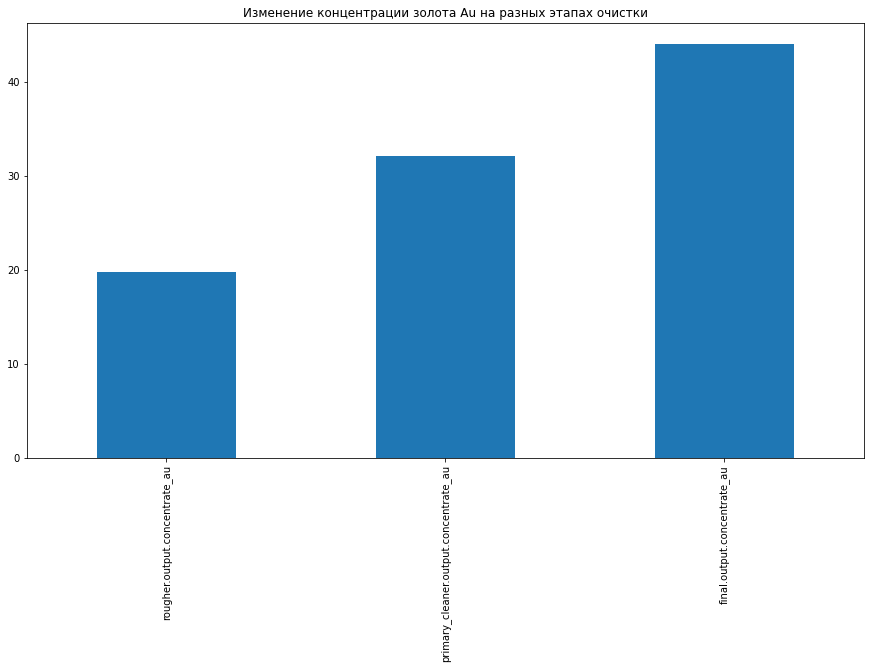

In [21]:
df_au.mean().plot(title = 'Изменение концентрации золота Au на разных этапах очистки', kind='bar', figsize=(15, 8)) 
plt.show()

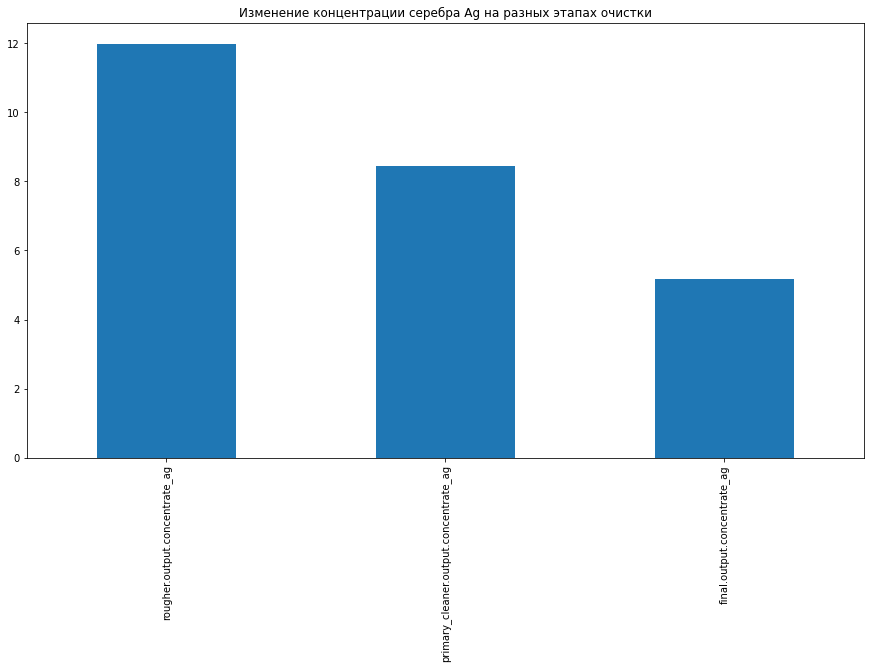

In [22]:
df_ag.mean().plot(title = 'Изменение концентрации серебра Ag на разных этапах очистки', kind='bar', figsize=(15, 8)) 
plt.show()

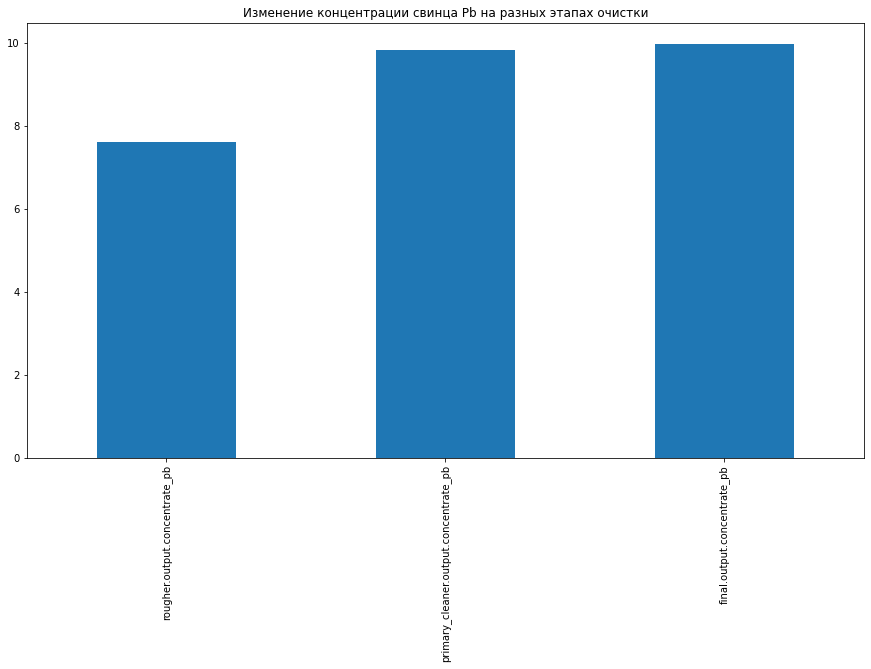

In [23]:
df_pb.mean().plot(title = 'Изменение концентрации свинца Pb на разных этапах очистки', kind='bar', figsize=(15, 8)) 
plt.show()

Из графиков выше мы видим, что конценции золота и свинца на каждом этапе возврастают, а концентрация серебра наоборот падает.

Теперь сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Для этого построим гистограмму.

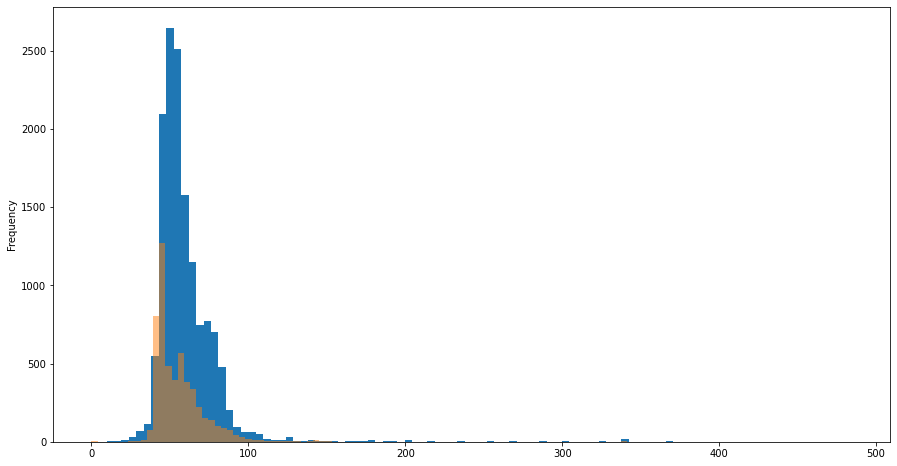

In [24]:
df_train['rougher.input.feed_size'].plot(
    kind='hist', 
    bins=100, 
    figsize=(15, 8))
df_test['rougher.input.feed_size'].plot(
    kind='hist', 
    bins=100, 
    alpha=0.5, 
    figsize=(15, 8))
plt.show()

На гистограмме выше мы можем видеть, что распределения размеров гранул сырья на обучающей и тестовой выборках практически не отличаются друг от друга, а это значит, что оценка модели будет неправильной.

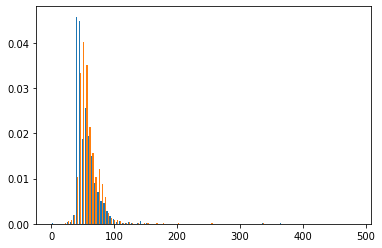

In [25]:
plt.hist([df_test['rougher.input.feed_size'], df_train['rougher.input.feed_size']], density = True, histtype='bar', bins=100)
plt.show()

Теперь исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Для этого, создадим отдельные таблицы с концентрациями всех веществ на каждой стадии. Затем просуммируем концентрации на каждом этапе и построим гистограммы для визуализации распределения концентраций, а также изучим полученные данные с помощью метода *describe*.

Начнем с сырья:

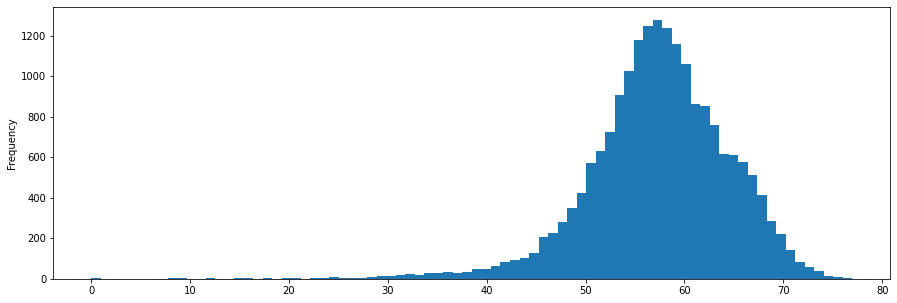

In [26]:
rougher_input_feed = df_full[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']]
rougher_input_feed.sum(axis=1).plot(
    kind='hist', 
    bins=80, 
    figsize=(15, 5))
plt.show()

In [27]:
rougher_input_feed.sum(axis=1).describe()

count    19439.000000
mean        57.320789
std          7.212680
min          0.040000
25%         53.557679
50%         57.594391
75%         61.953459
max         76.978947
dtype: float64

Теперь исследуем черновой концентрат:

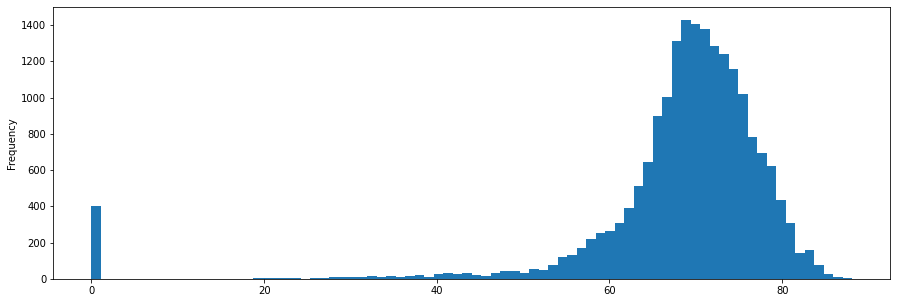

In [28]:
rougher_output_concentrate = df_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']]
rougher_output_concentrate.sum(axis=1).plot(
    kind='hist', 
    bins=80, 
    figsize=(15, 5))
plt.show()

In [29]:
rougher_output_concentrate.sum(axis=1).describe()

count    19439.000000
mean        68.170865
std         12.491279
min          0.000000
25%         66.012495
50%         70.181495
75%         74.356904
max         88.140119
dtype: float64

Исследуем финальный концентрат:

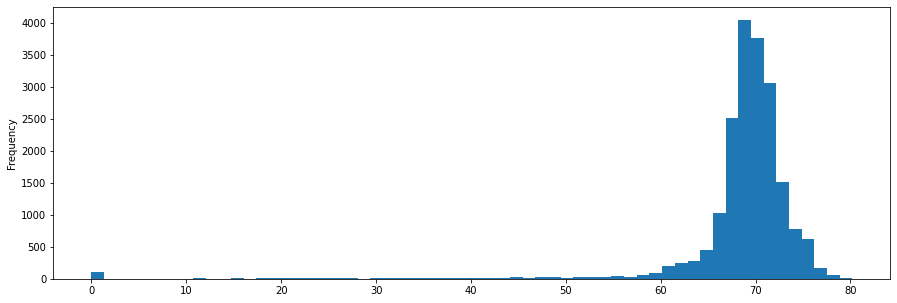

In [30]:
final_output_concentrate = df_full[['final.output.concentrate_pb', 'final.output.concentrate_ag', 'final.output.concentrate_sol', 'final.output.concentrate_au']]
final_output_concentrate.sum(axis=1).plot(
    kind='hist', 
    bins=60, 
    figsize=(15, 5))
plt.show()

In [31]:
final_output_concentrate.sum(axis=1).describe()

count    19439.000000
mean        68.653624
std          7.427536
min          0.000000
25%         67.932362
50%         69.598444
75%         71.368472
max         80.210644
dtype: float64

Итак, по полученным данным выше мы видим, что:
- все три распределения похожи на нормальные со смещением влево;
- суммарная концентрация всех веществ увеличивается;
- у нас есть пики в районе нуля на черновом и финальном концентратах, которые являются выбросами.

Выбросы вызваны, скорее всего, либо человеческой ошибкой, либо сбоем оборудования. Их необходимо удалить из тренировочной выборки, чтобы они не повлияли на обучение наших моделей. После удаления выбросов проверим размер тренировочной выборки и снова построим гистограммы, взяв за основу измененную тренировочную выборку.

In [32]:
df_train = df_train[(df_train['rougher.output.concentrate_ag'] != 0) &
                       (df_train['rougher.output.concentrate_au'] != 0) &
                       (df_train['rougher.output.concentrate_pb'] != 0) &
                       (df_train['rougher.output.concentrate_sol'] != 0)]
df_train.shape[0]

13849

In [33]:
df_train = df_train[(df_train['final.output.concentrate_ag'] != 0) &
                       (df_train['final.output.concentrate_au'] != 0) &
                       (df_train['final.output.concentrate_pb'] != 0) &
                       (df_train['final.output.concentrate_sol'] != 0)]
df_train.shape[0]

13792

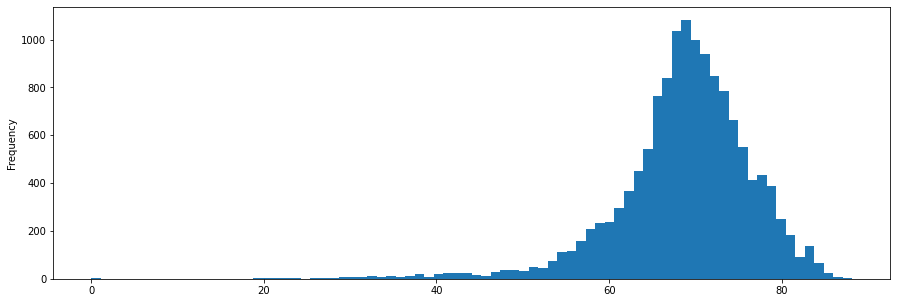

In [34]:
rougher_output_concentrate_2 = df_train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']]
rougher_output_concentrate_2.sum(axis=1).plot(
    kind='hist', 
    bins=80, 
    figsize=(15, 5))
plt.show()

In [35]:
rougher_output_concentrate_2.sum(axis=1).describe()

count    13792.000000
mean        68.619029
std          8.093252
min          0.040000
25%         65.250513
50%         69.312316
75%         73.508347
max         88.140119
dtype: float64

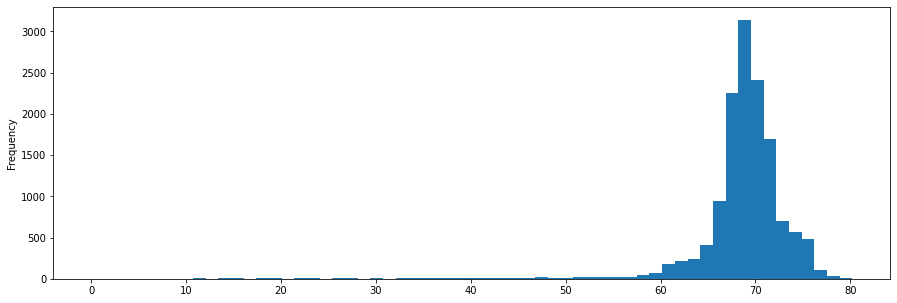

In [36]:
final_output_concentrate_2 = df_train[['final.output.concentrate_pb', 'final.output.concentrate_ag', 'final.output.concentrate_sol', 'final.output.concentrate_au']]
final_output_concentrate_2.sum(axis=1).plot(
    kind='hist', 
    bins=60, 
    figsize=(15, 5))
plt.show()

In [37]:
final_output_concentrate_2.sum(axis=1).describe()

count    13792.000000
mean        68.665735
std          5.430027
min          0.040000
25%         67.559796
50%         69.136175
75%         70.953556
max         80.210644
dtype: float64

Теперь наши данные выглядят более правдоподобными и готовы для обучения моделей ML.

## Модель

 Напишем функцию для вычисления итоговой sMAPE.

In [38]:
def smape(t, p):
    return 100* 1/len(t) * np.sum((np.abs(t-p))/((np.abs(t) + np.abs(p)) / 2))

def smape_total(rougher, final):
    return 0.25 * rougher + 0.75 * final

Далее нам необходимо добавить в тестовую выборку целевые признаки из полной выборки. Для этого создадим новый датасет с целевыми признаками и объеденим его с тестовой выборкой по столбцу *date*.

In [39]:
df_target = df_full[['date', 'rougher.output.recovery', 'final.output.recovery']]

In [40]:
df_test = df_test.merge(df_target, on='date', how='left')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

Теперь отбросим столбец *date* из тестовой выборки, поскольку он не нужен нам для дальнейшего обучения. Из тренировочной выборки тоже отбросим столбец *date*, а также все признаки, отсутствующие в тестовой выборке.

In [41]:
df_test.drop(['date'], axis=1, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null   float64
 10  primary_clea

In [42]:
list_of_values = set(df_train) - set(df_test)

In [43]:
df_train.drop(list_of_values, axis=1, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13792 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       13792 non-null  float64
 1   primary_cleaner.input.sulfate               13792 non-null  float64
 2   primary_cleaner.input.depressant            13792 non-null  float64
 3   primary_cleaner.input.feed_size             13792 non-null  float64
 4   primary_cleaner.input.xanthate              13792 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13792 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13792 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13792 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13792 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13792 non-null  float64
 10  primary_cl

Выделим отдельно признаки и целевые признаки для *rougher.output.recovery* и *final.output.recovery*.

In [45]:
features_train_r = df_train.drop(['rougher.output.recovery'], axis=1)
target_train_r = df_train['rougher.output.recovery']

features_test_r = df_test.drop(['rougher.output.recovery'], axis=1)
target_test_r = df_test['rougher.output.recovery']

features_train_f = df_train.drop(['final.output.recovery'], axis=1)
target_train_f = df_train['final.output.recovery']

features_test_f = df_test.drop(['final.output.recovery'], axis=1)
target_test_f = df_test['final.output.recovery']

Введем *smape_scorer* с помощью функции *make_scorer* для использования ее в кросс-валидации.

In [46]:
smape_scorer = make_scorer(smape, greater_is_better=False)

Далее обучим 3 модели:
- дерево решений,
- случайный лес,
- линейная регрессия.

Перебор всех гиперпараметров для наших моделей займет огромное количество времени, поэтому мы ограничемся только перебором глубины *max_depth* для дерева решений и случайного леса, при этом гиперпараметр *n_estimators* для случайного леса выставим равным 10 (как это было заложено раньше в предыдущих версиях этой функции).

После обучения моделей выберем лучшую из них.

In [47]:
for depth in range(1, 11):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scores_r_tree = cross_val_score(model, features_train_r, target_train_r, scoring = smape_scorer, cv=5)
    scores_f_tree = cross_val_score(model, features_train_f, target_train_f, scoring = smape_scorer, cv=5)
    print('sMape для дерева решений:', np.abs(smape_total(scores_r_tree, scores_f_tree).mean()), 'при глубине max_depth =', depth)

sMape для дерева решений: 8.692821143656928 при глубине max_depth = 1
sMape для дерева решений: 7.771485911791355 при глубине max_depth = 2
sMape для дерева решений: 7.744654985635347 при глубине max_depth = 3
sMape для дерева решений: 7.906059063912238 при глубине max_depth = 4
sMape для дерева решений: 8.236707033787093 при глубине max_depth = 5
sMape для дерева решений: 8.64483119639112 при глубине max_depth = 6
sMape для дерева решений: 8.76715226597203 при глубине max_depth = 7
sMape для дерева решений: 9.260099658531141 при глубине max_depth = 8
sMape для дерева решений: 10.249432200649556 при глубине max_depth = 9
sMape для дерева решений: 10.977662341127031 при глубине max_depth = 10


In [54]:
for depth in range(1, 11):
    model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
    scores_r_forest = cross_val_score(model, features_train_r, target_train_r, scoring = smape_scorer, cv=5)
    scores_f_forest = cross_val_score(model, features_train_f, target_train_f, scoring = smape_scorer, cv=5)
    print('sMape для случайного леса:', np.abs(smape_total(scores_r_forest, scores_f_forest).mean()), 'при глубине max_depth =', depth)

sMape для случайного леса: 8.496857833268367 при глубине max_depth = 1
sMape для случайного леса: 7.564571917535292 при глубине max_depth = 2
sMape для случайного леса: 7.435417690160162 при глубине max_depth = 3
sMape для случайного леса: 7.342460982056755 при глубине max_depth = 4
sMape для случайного леса: 7.347655927952087 при глубине max_depth = 5
sMape для случайного леса: 7.413561569103304 при глубине max_depth = 6
sMape для случайного леса: 7.507321640900507 при глубине max_depth = 7
sMape для случайного леса: 7.75431943063824 при глубине max_depth = 8
sMape для случайного леса: 7.954477911847286 при глубине max_depth = 9
sMape для случайного леса: 8.02496396335385 при глубине max_depth = 10


In [61]:
model = LinearRegression()
scores_r_lin = cross_val_score(model, features_train_r, target_train_r, cv=5, scoring = smape_scorer)
scores_f_lin =  cross_val_score(model, features_train_f, target_train_f, cv=5, scoring = smape_scorer)
print('sMape для линейной регрессии:', np.abs(smape_total(scores_r_lin, scores_f_lin).mean()))

sMape для линейной регрессии: 7.757055791464074


In [67]:
eNet = ElasticNet()

scores_r_en = cross_val_score(eNet, features_train_r, target_train_r, cv=5, scoring = smape_scorer)
scores_f_en =  cross_val_score(eNet, features_train_f, target_train_f, cv=5, scoring = smape_scorer)
print('sMape для линейной регрессии:', np.abs(smape_total(scores_r_en, scores_f_en).mean()))

sMape для линейной регрессии: 7.532240070983735


Итак, нашей лучшей моделью является модель случайного леса *RandomForestRegressor* при **n_estimators=10** и глубине **max_depth = 5**, значение **sMape** получилось равным **7.2852**. Проверим ее на тестовой выборке.

In [50]:
model_r = RandomForestRegressor(max_depth=5, n_estimators=10, random_state=12345)
model_f = RandomForestRegressor(max_depth=5, n_estimators=10, random_state=12345)

model_r.fit(features_train_r, target_train_r)
model_f.fit(features_train_f, target_train_f)

predictions_r = model_r.predict(features_test_r)
predictions_f = model_f.predict(features_test_f)

smape_r = smape(target_test_r, predictions_r)
smape_f = smape(target_test_f, predictions_f)

print('sMAPE для тестовых данных:', np.abs(smape_total(smape_r, smape_f)))

sMAPE для тестовых данных: 10.589290444567386


## Вывод ##

В ходе проделанной работы мы:
- Изучили исходные данные и провели их предобработку.
- Проверили, что эффективность обогащения рассчитана правильно.
- Провели анализ данных, в ходе которого узнали, как меняются концентрации веществ на разных стадиях, а также сравнили распределения размеров гранул сырья на обучающей и тестовой выборках.
- Написали функцию для рассета sMape.
- Обучили различные модели и выбрали лучшую из них: это модель случайного леса **RandomForestRegressor** при n_estimators=10 и глубине max_depth = 5, значение **sMape** получилось равным **7.2852**.
- Проверили модель на тестовой выборке, значение **sMape** вышло **10.5892**